# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [49]:
def summary_stats(numbers):
    mean = sum(numbers)/len(numbers)
    squares = [(i-mean)**2 for i in numbers]
    sum_squares = sum(squares)
    var = sum_squares / (len(numbers) - 1)
    std = var ** 0.5
    return (('Mean:', mean), ('Variance:', var), ('Standard Deviation:', std))

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
summary_stats(sales)

(('Mean:', 3052.714285714286),
 ('Variance:', 214387.90476190473),
 ('Standard Deviation:', 463.0204150595357))

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

customers = [127, 80, 105, 92, 120, 115, 93]
sales_df = pd.DataFrame({'sales': sales, 'customers': customers})
sales_customers_cov = sales_df.cov()
sales_customers_cov

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [51]:
def std_dev(numbers):
    mean = sum(numbers) / len(numbers)
    squares = [(i - mean)**2 for i in numbers]
    sum_squares = sum(squares)
    var = sum_squares / (len(numbers) - 1)
    std = var ** 0.5
    return std

sales_std = std_dev(sales)
customers_std = std_dev(customers)
print(sales_std)
print(customers_std)

463.0204150595357
17.057326313123664


In [52]:
print(sales_df.corr())

              sales  customers
sales      1.000000   0.962834
customers  0.962834   1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [54]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [55]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

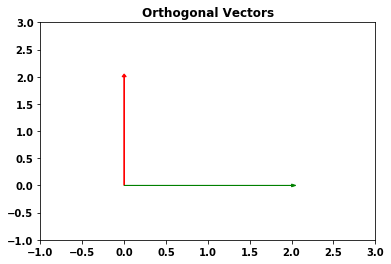

In [58]:
vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot vectors
plt.arrow(0, 0, vector_1[0], vector_1[1], head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width=0.05, head_length=0.05, color='green')
plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.title('Orthogonal Vectors')
plt.show()

### Another word for orthogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [59]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

-40

### Vectors a & b are not orthogonal because their dot product is not 0

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [60]:
c = [2, -15, 6, 20]

c_norm_sqr = np.linalg.norm(c)**2
c_dot_c = np.dot(c, c)
c_T = np.transpose(c)
cTc = c_T * c

print('c norm squared:', c_norm_sqr)
print('c dot c:', c_dot_c)
print('c transpose time c:', cTc)

c norm squared: 665.0
c dot c: 665
c transpose time c: [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0\end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [62]:
f = [4, 12, 11, 9, 2]
f_norm = np.linalg.norm(f)
unit_vector = 1 / f_norm
print(unit_vector)

0.05227083734893167


In [63]:
np.multiply(unit_vector, f)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

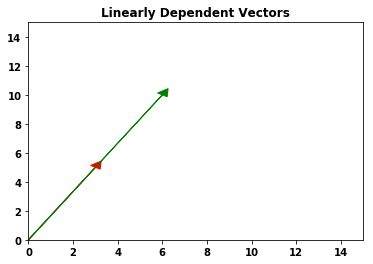

In [94]:
lin_dep_1 = [3, 5]
lin_dep_2 = [6, 10]

plt.arrow(0, 0, lin_dep_1[0], lin_dep_1[1], head_width=0.5, head_length=0.5, color='red')
plt.arrow(0, 0, lin_dep_2[0], lin_dep_2[1], head_width=0.5, head_length=0.5, color='green')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.title('Linearly Dependent Vectors')
plt.show()

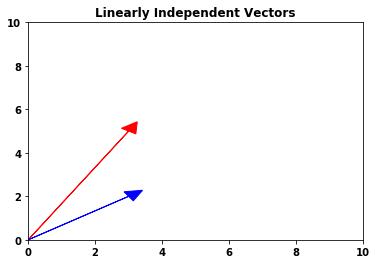

In [93]:
lin_ind_1 = [3, 5]
lin_ind_2 = [3, 2]

plt.arrow(0, 0, lin_ind_1[0], lin_ind_1[1], head_width=0.5, head_length=0.5, color='red')
plt.arrow(0, 0, lin_ind_2[0], lin_ind_2[1], head_width=0.5, head_length=0.5, color='blue')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

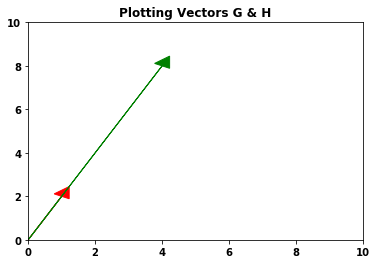

In [96]:
g = [1, 2]
h = [4, 8]

plt.arrow(0, 0, g[0], g[1], head_width=0.5, head_length=0.5, color='red')
plt.arrow(0, 0, h[0], h[1], head_width=0.5, head_length=0.5, color='green')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Plotting Vectors G & H')
plt.show()

### Since vectors g and h are linearly dependent, they can only scale up and down a one-dimensional line, so their span is the 1-d line.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

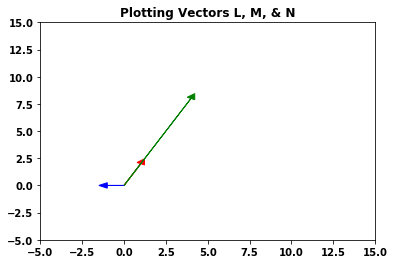

In [95]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

plt.arrow(0, 0, l[0], l[1], head_width=0.5, head_length=0.5, color='red')
plt.arrow(0, 0, m[0], m[1], head_width=0.5, head_length=0.5, color='blue')
plt.arrow(0, 0, n[0], n[1], head_width=0.5, head_length=0.5, color='green')
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.title('Plotting Vectors L, M, & N')
plt.show()

### vectors l and n are linearly dependent, so their span is a 1-d line. Vectors l and m, & Vectors m and n are linearly independent, so they have an infinite span within 2-d space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



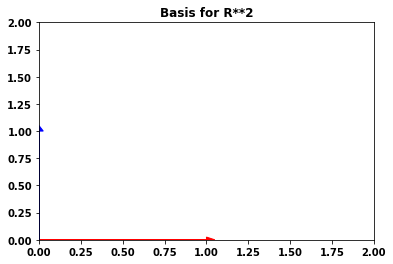

In [91]:
basis_1 = [1, 0]
basis_2 = [0, 1]

plt.arrow(0, 0, basis_1[0], basis_1[1], head_width=0.05, head_length=0.05, color='red')
plt.arrow(0, 0, basis_2[0], basis_2[1], head_width=0.05, head_length=0.05, color='blue')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.title('Basis for R**2')
plt.show()

## 6.2 What does it mean to form a basis?

A basis can be any 2 vectors that are linearly independent and can span the vector space (meaning: they can create any vector within their dimensional space when added, subtracted, and scaled).

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [97]:
p = [[1, 2, 3],
    [-1, 0, 7],
    [4, 8, 2]]

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix is the dimension of the vector space spanned by its columns. Just because a matrix has a certain number of rows and columns doesn't mean it will span that dimensional space. Sometimes there are redundancies from linearly dependent rows/columms which can be seen when the matrix is reduced to row-echelon form. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [103]:
v = [1, 3]
w = [-1, 2]

# ((w.v) / (v.v)) v
wv = np.dot(w, v)
vv = np.dot(v, v)
wv_divided_by_vv = (wv / vv)
proj = np.multiply(wv_divided_by_vv, v)
print('w.v:', wv)
print('v.v', vv)
print('w.v / v.v:', wv_divided_by_vv)
print('Projection of w onto l', proj)

w.v: 5
v.v 10
w.v / v.v: 0.5
Projection of w onto l [0.5 1.5]


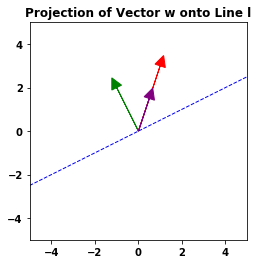

In [108]:
# axis bounds
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# get vals for l
x_vals = np.array(axes.get_xlim())
y_vals = 1/2 * x_vals

# plotted vectors
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], head_width=0.5, head_length=0.5, color='red')
plt.arrow(0, 0, w[0], w[1], head_width=0.5, head_length=0.5, color='green')
plt.arrow(0, 0, proj[0], proj[1], head_width=0.5, head_length=0.5, color='purple')

plt.title('Projection of Vector w onto Line l')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

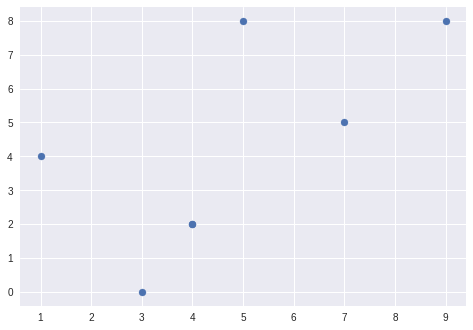

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()